In [1]:
%pwd

'C:\\Users\\rlath\\JupyterNotebook\\DataItGirls\\titanic'

In [2]:
%ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 44EC-5869

 C:\Users\rlath\JupyterNotebook\DataItGirls\titanic 디렉터리

2018-08-27  오후 12:07    <DIR>          .
2018-08-27  오후 12:07    <DIR>          ..
2018-08-27  오전 10:07    <DIR>          .ipynb_checkpoints
2018-08-26  오후 07:02            46,879 180813_kaggle_titanic.ipynb
2018-08-27  오후 12:07           121,620 180821_decision_tree_on_kaggle_titanic.ipynb
2018-08-27  오전 10:34           156,464 180827_01_missing_value.ipynb
2018-08-27  오전 11:23            20,995 180827_02_binning.ipynb
2018-08-27  오전 11:16            55,524 180827_03_one_hot_encoding.ipynb
2018-08-24  오후 12:39                 0 decision-tree.dot
2018-08-27  오전 10:24    <DIR>          submissions
2018-08-24  오후 12:38             3,258 submit.csv
2018-08-13  오전 11:39            28,629 test.csv
2018-08-13  오전 11:39            61,194 train.csv
               9개 파일             494,563 바이트
               4개 디렉터리  192,417,443,840 바이트 남음


In [3]:
import pandas as pd

In [4]:
import numpy as np
from plotnine import *

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.shape

(891, 12)

In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.shape

(418, 11)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train['Age_mean'] = train['Age'].fillna(train['Age'].mean())

In [75]:
test['Age_mean'] = test['Age'].fillna(test['Age'].mean())

In [14]:
train['Age_mean'].isnull().sum()

0

In [15]:
train['Age'].isnull().sum()

177

In [16]:
train['Age_mean'].mean()

29.699117647058763

In [17]:
train['Age'].mean()

29.69911764705882

# One-Hot_Encoding

In [18]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train['Gender'] = train['Sex'] == 'female'

In [76]:
test['Gender'] = test['Sex'] == 'female'

In [20]:
train['Gender'].head()

0    False
1     True
2     True
3     True
4    False
Name: Gender, dtype: bool

In [21]:
train['Embarked'].isnull().sum()

2

In [22]:
test['Embarked'].isnull().sum()

0

In [23]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'

In [24]:
train['Embarked_S'].sum()

644

In [25]:
train['Embarked_C'].sum()

168

In [26]:
train['Embarked_Q'].sum()

77

In [27]:
train['Embarked_S'].head()

0     True
1    False
2     True
3     True
4     True
Name: Embarked_S, dtype: bool

In [28]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'

In [29]:
train[['Embarked_S', 'Embarked_C', 'Embarked_Q']].astype(int)

,Embarked_S,Embarked_C,Embarked_Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,1,0,0
7,1,0,0
8,1,0,0
9,0,1,0


# 가족 수 구하기

In [30]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [31]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

In [32]:
train['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [33]:
train['Family_bin'] = pd.cut(train['Family_size'], [0, 1, 4, 11], labels=['S', 'M', 'L'])
train[['Family_size', 'Family_bin']].head()

,Family_size,Family_bin
0,2,M
1,2,M
2,1,S
3,2,M
4,1,S


In [34]:
# train['Family'] = train['Family_size']
# train.loc[train['Family_size'] == 1, 'Family'] ='S'
# train.loc[(train['Family_size'] > 1) & (train['Family_size'] < 5), 'Family'] ='M'
# train.loc[train['Family_size'] > 4, 'Family'] = 'L'

In [35]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1
test['Family_bin'] = pd.cut(train['Family_size'], [0, 1, 4, 11], labels=['S', 'M', 'L'])
# test['Family'] = test['Family_size']
# test.loc[test['Family_size'] == 1, 'Family'] = 'S'
# test.loc[(test['Family_size'] > 1) & (test['Family_size'] < 5), 'Family'] = 'M'
# test.loc[test['Family_size'] > 4, 'Family'] = 'L'

In [36]:
train['Family_bin'].value_counts()

S    537
M    292
L     62
Name: Family_bin, dtype: int64

In [37]:
train[['Embarked_S', 'Embarked_C', 'Embarked_Q']] = train[['Embarked_S', 'Embarked_C', 'Embarked_Q']].astype(int)

In [38]:
train['Gender'] = train['Gender'].astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Gender,Embarked_S,Embarked_C,Embarked_Q,Family_size,Family_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,0,1,0,0,2,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,0,1,0,2,M
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1,1,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1,1,0,0,2,M
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,0,1,0,0,1,S


In [39]:
train['Family_S'] = train['Family_bin'] == 'S'
train['Family_M'] = train['Family_bin'] == 'M'
train['Family_L'] = train['Family_bin'] == 'L'

In [40]:
train[['Family_S', 'Family_M', 'Family_L']] = train[['Family_S', 'Family_M', 'Family_L']].astype(int)

In [41]:
test['Family_S'] = test['Family_bin'] == 'S'
test['Family_M'] = test['Family_bin'] == 'M'
test['Family_L'] = test['Family_bin'] == 'L'

In [42]:
test[['Family_S', 'Family_M', 'Family_L']] = test[['Family_S', 'Family_M', 'Family_L']].astype(int)

In [43]:
test[['Embarked_S', 'Embarked_C', 'Embarked_Q']] = test[['Embarked_S', 'Embarked_C', 'Embarked_Q']].astype(int)

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_S,Embarked_C,Embarked_Q,Family_size,Family_bin,Family_S,Family_M,Family_L
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,1,M,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,2,M,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,1,S,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1,M,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,3,S,1,0,0


In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_mean,Gender,Embarked_S,Embarked_C,Embarked_Q,Family_size,Family_bin,Family_S,Family_M,Family_L
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22.0,0,1,0,0,2,M,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38.0,1,0,1,0,2,M,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26.0,1,1,0,0,1,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35.0,1,1,0,0,2,M,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35.0,0,1,0,0,1,S,1,0,0


In [46]:
# !pip install graphviz

In [108]:
feature_names = ['Age_mean', 'Gender',
                 #'Embarked_S', 'Embarked_C', 'Embarked_Q',
                 'Family_S', 'Family_M', 'Family_L', 'Pclass']

In [109]:
feature_names.append('Fare_L')
feature_names.append('Fare_M')
feature_names.append('Fare_H')
# feature_names

In [110]:
X_train = train[feature_names]

In [111]:
y_train = train['Survived']

In [112]:
max(train['Fare'])

512.3292

In [113]:
train['Fare_mean'] = train['Fare']

In [114]:
test['Fare_mean'] = test['Fare']

In [115]:
train.loc[train['Fare_mean'] == 0, 'Fare_mean'] = 8.05
# train.loc[train['Fare_mean'] == 0]

In [116]:
train['Fare_mean'].values

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,
        61.9792,  35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
         7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
        10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,
        73.5   ,  14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        10.5   ,  15.85  ,  34.375 ,   8.05  , 263.    ,   8.0

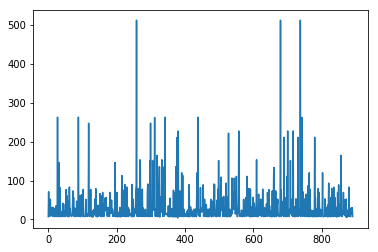

In [117]:
import matplotlib.pyplot as plt


plt.plot(train['Fare_mean'].values)

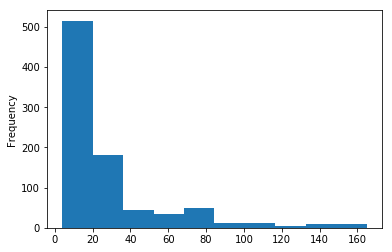

In [118]:
train.loc[train['Fare_mean'] < 200]['Fare_mean'].plot.hist()

In [119]:
# train['Fare_categ'] = train['Fare_mean']
# train.loc[train['Fare_mean'] <= 20, 'Fare_categ'] = 'Low'
# train.loc[(train['Fare_mean'] > 20) & (train['Fare_mean'] <= 80), 'Fare_categ'] = 'Med'
# train.loc[train['Fare_mean'] > 80, 'Fare_categ'] = 'High'
train['Fare_categ'] = pd.cut(train['Fare_mean'], [0, 20, 80, 513], labels=['S', 'M', 'L'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Family_bin,Family_S,Family_M,Family_L,Fare_mean,Fare_categ,Fare_L,Fare_M,Fare_H
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,M,0,1,0,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,M,0,1,0,71.2833,M,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,S,1,0,0,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,M,0,1,0,53.1000,M,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,S,1,0,0,8.0500,S,0,0,1


In [120]:
train['Fare_L'] = train['Fare_categ'] == 'L'
train['Fare_M'] = train['Fare_categ'] == 'M'
train['Fare_H'] = train['Fare_categ'] == 'S'

In [121]:
train[['Fare_L', 'Fare_M', 'Fare_H']] = train[['Fare_L', 'Fare_M', 'Fare_H']].astype(int)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Family_bin,Family_S,Family_M,Family_L,Fare_mean,Fare_categ,Fare_L,Fare_M,Fare_H
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,M,0,1,0,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,M,0,1,0,71.2833,M,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,S,1,0,0,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,M,0,1,0,53.1000,M,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,S,1,0,0,8.0500,S,0,0,1


In [123]:
test['Fare_categ'] = pd.cut(test['Fare_mean'], [0, 20, 80, 513], labels=['S', 'M', 'L'])
test['Fare_L'] = test['Fare_categ'] == 'L'
test['Fare_M'] = test['Fare_categ'] == 'M'
test['Fare_H'] = test['Fare_categ'] == 'S'
test[['Fare_L', 'Fare_M', 'Fare_H']] = test[['Fare_L', 'Fare_M', 'Fare_H']].astype(int)
test.head()
# test['Fare_categ'] = test['Fare_mean']
# test.loc[test['Fare_mean'] <= 20, 'Fare_categ'] = 'Low'
# test.loc[(test['Fare_mean'] > 20) & (test['Fare_mean'] <= 80), 'Fare_categ'] = 'Med'
# test.loc[test['Fare_mean'] > 80, 'Fare_categ'] = 'High'

# test['Fare_L'] = test['Fare_categ'] == 'Low'
# test['Fare_M'] = test['Fare_categ'] == 'Med'
# test['Fare_H'] = test['Fare_categ'] == 'High'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family_M,Family_L,Fare_mean,Fare_categ,Fare_L,Fare_M,Fare_H,Age_mean,Gender,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,7.8292,S,0,0,1,34.5,False,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,7.0000,S,0,0,1,47.0,True,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,9.6875,S,0,0,1,62.0,False,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,8.6625,S,0,0,1,27.0,False,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,12.2875,S,0,0,1,22.0,True,1


In [124]:
X_test = test[feature_names]

In [125]:
X_train = train[feature_names]
y_train = train['Survived']

In [126]:
X_train.head()

,Age_mean,Gender,Family_S,Family_M,Family_L,Pclass,Fare_L,Fare_M,Fare_H
0,22.0,0,0,1,0,3,0,0,1
1,38.0,1,0,1,0,1,0,1,0
2,26.0,1,1,0,0,3,0,0,1
3,35.0,1,0,1,0,1,0,1,0
4,35.0,0,1,0,0,3,0,0,1


In [127]:
# feature_names.pop(feature_names.index('Fare_L'))

In [128]:
# feature_names

In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=2018)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [130]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [131]:
scoring = 'accuracy'
score = cross_val_score(model, X_train, y_train, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.79775281 0.79775281 0.86516854 0.79775281
 0.84269663 0.84269663 0.83146067 0.84269663]


In [132]:
round(np.mean(score)*100, 2)

82.6

In [133]:
test['Survived'] = prediction

In [134]:
submissions = test[['PassengerId', 'Survived']]
submissions.to_csv('submit.csv', index=False)

In [ ]:
# submissions

In [ ]:
# !pip show graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
# C:\Users\rlath\Anaconda3\Lib\site-packages

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
# graphviz.Source(dot_graph)

In [ ]:
graphviz.Source(dot_graph)